In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from math import *
from Y_views import *
%matplotlib inline

# Reading data

In [2]:
all_hits = pd.read_csv('Data/strawtubesPoint_decoded_hits.csv', delimiter=',')
all_hits['Index'] = all_hits.index
all_hits = all_hits[['Index', 'X', 'Y', 'Z', 'TrackID', 'Time', 'StatNb', 'ViewNb', 'PlaneNb', 'LayerNb', 'StrawNb', 'dist2Wire', 'event', 'k']]
all_hits.head()

,Index,X,Y,Z,TrackID,Time,StatNb,ViewNb,PlaneNb,LayerNb,StrawNb,dist2Wire,event,k
0,0,8.883409,-61.202305,-1974.859985,3,232.044861,5,0,0,0,319,0.274822,0,0
1,1,8.858191,-61.225544,-1973.742188,3,232.074081,5,0,0,1,320,0.582455,0,1
2,2,8.824563,-61.256523,-1972.251953,3,232.118286,5,0,1,0,319,0.111252,0,2
3,3,8.632817,-61.432972,-1963.756592,3,232.406479,5,1,0,1,320,0.164412,0,3
4,4,8.573978,-61.487133,-1961.149292,3,232.488541,5,1,1,1,320,0.226827,0,4


# Comparing result of the algorithm and reality

# Testing algorithm on 1 & 2 stations

In [45]:
# function for testing 
def tester_1_2(event_id):
    event0 = all_hits[all_hits['event'] == event_id]
    event0 = modify_for_yz_analysis_1_2(event0)
    
    tracks, linking_table = loop_yz(event0, 7, 0.85, 0)
    
    trackIDs = set(event0.TrackID.values)
    trackIDs.discard(-2)
    real_tracks = {}
    for i in trackIDs:
        real_tracks[i] = np.polyfit(event0[event0['TrackID'] == i]['Z'].values,
                                    event0[event0['TrackID'] == i]['Y'].values, 1)
        
    plt.scatter(event0['Wz'], event0['Wy'])
    t = np.arange(2550, 2850, 299)
    for i in tracks:
        plt.plot(t, tracks[i][0] * t + tracks[i][1], lw = 2, c = 'black')
    for i in real_tracks:
        plt.plot(t, real_tracks[i][0] * t + real_tracks[i][1], lw = 2, c = 'green')
    print "event_id:" + str(event_id)
    print "number of hits:" + str(len(event0))
    print "number of recognised tracks: " + str(len(tracks))
    print "number of real tracks: " + str(len(real_tracks))
    print "green - real tracks; black - recognised tracks"
    plt.show()

# Test 1

event_id:14
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


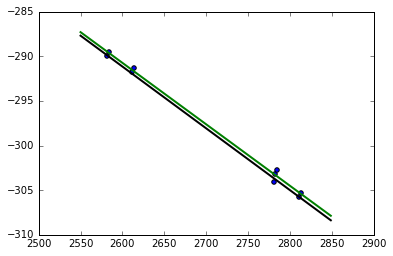

In [46]:
tester_1_2(14)

# Test 2

event_id:3
number of hits:1090
number of recognised tracks: 32
number of real tracks: 19
green - real tracks; black - recognised tracks


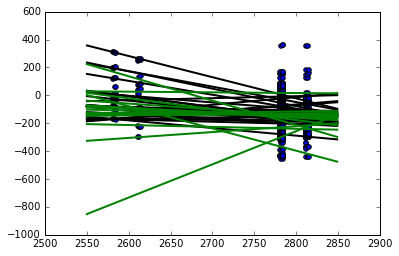

In [47]:
#according to the article for events with more than 500 hits algorithm does not work
tester_1_2(3)

# Test 3

event_id:7
number of hits:17
number of recognised tracks: 1
number of real tracks: 2
green - real tracks; black - recognised tracks


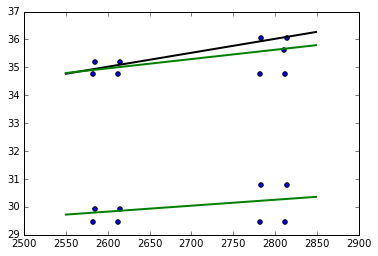

In [48]:
tester_1_2(7)

# Test 4

event_id:51
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


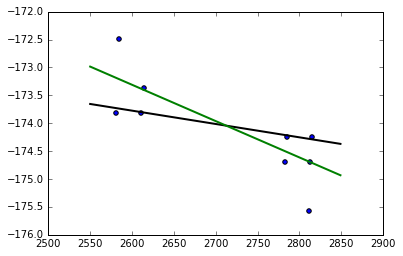

In [49]:
tester_1_2(51)

# Test 5

event_id:17
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


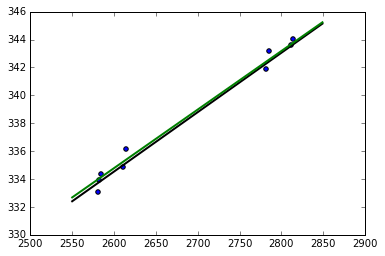

In [50]:
tester_1_2(17)

# test 6

event_id:2
number of hits:17
number of recognised tracks: 1
number of real tracks: 2
green - real tracks; black - recognised tracks


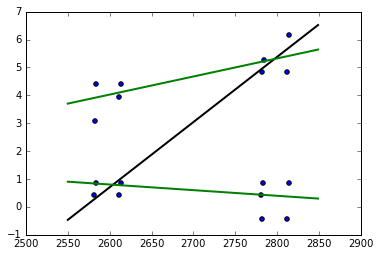

In [51]:
tester_1_2(2)

# test 7

event_id:59
number of hits:27
number of recognised tracks: 1
number of real tracks: 5
green - real tracks; black - recognised tracks


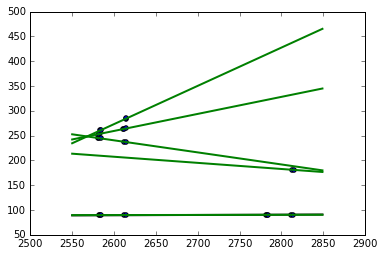

In [52]:
tester_1_2(59)

# test 8

event_id:137
number of hits:50
number of recognised tracks: 1
number of real tracks: 4
green - real tracks; black - recognised tracks


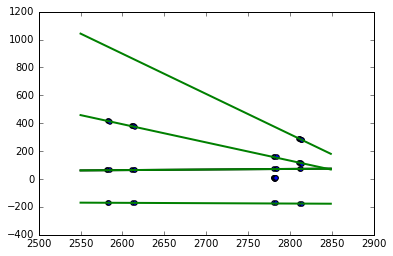

In [53]:
tester_1_2(137)

# test 9

event_id:185
number of hits:60
number of recognised tracks: 2
number of real tracks: 4
green - real tracks; black - recognised tracks


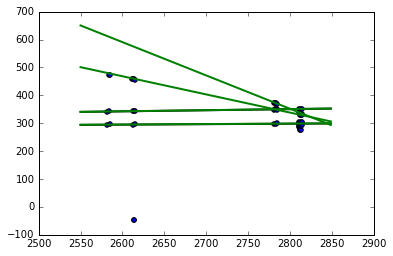

In [54]:
tester_1_2(185)

# test 10

event_id:206
number of hits:111
number of recognised tracks: 2
number of real tracks: 8
green - real tracks; black - recognised tracks


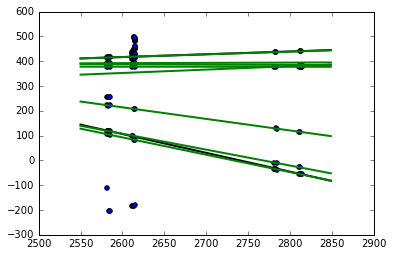

In [55]:
tester_1_2(206)

# test 11

event_id:207
number of hits:46
number of recognised tracks: 0
number of real tracks: 5
green - real tracks; black - recognised tracks


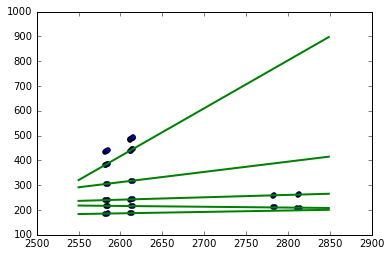

In [56]:
tester_1_2(207)

# Testing algorithm on 3 & 4 stations

In [57]:
# function for testing 
def tester_3_4(event_id):
    event0 = all_hits[all_hits['event'] == event_id]
    event0 = modify_for_yz_analysis_3_4(event0)
    
    tracks, linking_table = loop_yz(event0, 7, 0.85, 1)
    
    trackIDs = set(event0.TrackID.values)
    trackIDs.discard(-2)
    real_tracks = {}
    for i in trackIDs:
        real_tracks[i] = np.polyfit(event0[event0['TrackID'] == i]['Z'].values,
                                    event0[event0['TrackID'] == i]['Y'].values, 1)
        
    plt.scatter(event0['Wz'], event0['Wy'], color = 'black')
    #plt.scatter(event0['Z'], event0['Y'], color = 'green')
    t = np.arange(3220, 3600, 340)
    for i in real_tracks:
        plt.plot(t, real_tracks[i][0] * t + real_tracks[i][1], lw = 2, c = 'green')
    for i in tracks:
        plt.plot(t, tracks[i][0] * t + tracks[i][1], lw = 2, c = 'black')
    print "event_id:" + str(event_id)
    print "number of hits:" + str(len(event0))
    print "number of recognised tracks: " + str(len(tracks))
    print "number of real tracks: " + str(len(real_tracks))
    print "green - real tracks; black - recognised tracks"
    plt.show()

# Test 1

event_id:51
number of hits:9
number of recognised tracks: 1
number of real tracks: 1
green - real tracks; black - recognised tracks


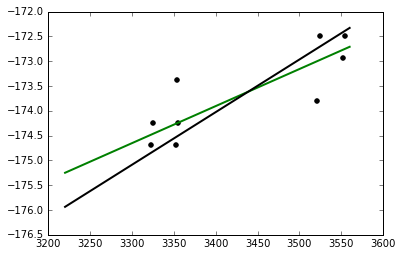

In [58]:
tester_3_4(51)

# Test 2

event_id:3
number of hits:86
number of recognised tracks: 0
number of real tracks: 5
green - real tracks; black - recognised tracks


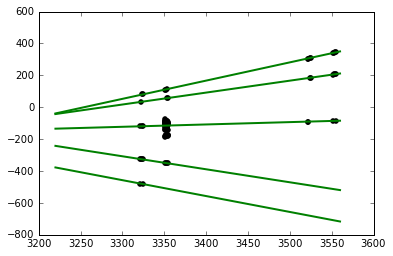

In [59]:
tester_3_4(3)

# Test 3

event_id:153
number of hits:8
number of recognised tracks: 0
number of real tracks: 1
green - real tracks; black - recognised tracks


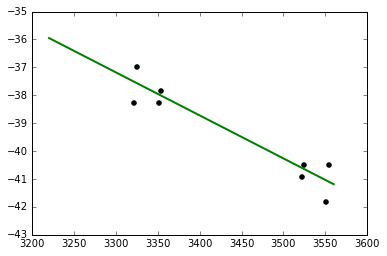

In [60]:
tester_3_4(153)

# Test 4

event_id:17
number of hits:8
number of recognised tracks: 0
number of real tracks: 1
green - real tracks; black - recognised tracks


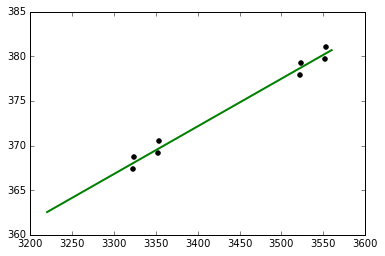

In [61]:
tester_3_4(17)

# Test 5

event_id:185
number of hits:65
number of recognised tracks: 2
number of real tracks: 8
green - real tracks; black - recognised tracks


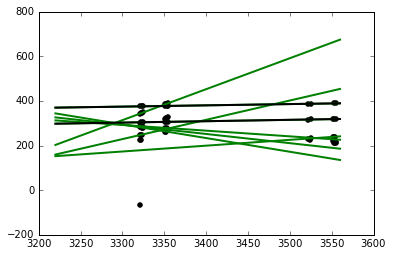

In [62]:
tester_3_4(185)

# Test 6

event_id:207
number of hits:19
number of recognised tracks: 0
number of real tracks: 2
green - real tracks; black - recognised tracks


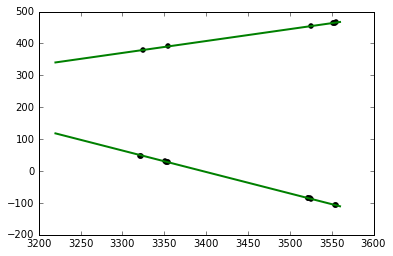

In [63]:
tester_3_4(207)

# Test 7

event_id:208
number of hits:17
number of recognised tracks: 0
number of real tracks: 2
green - real tracks; black - recognised tracks


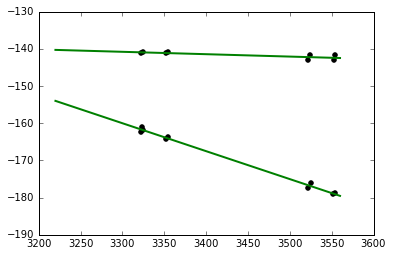

In [64]:
tester_3_4(208)